### Name: Sanchit Manchanda
### Task: Stock Market Prediction Using Numerical and Textual Analysis
### #GRIPAPRIL21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('nifty50.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-20,8618.799805,8619.950195,8422.750000,8448.099609,8448.099609,148900.0
1,2015-04-21,8416.099609,8469.349609,8352.700195,8377.750000,8377.750000,407800.0
2,2015-04-22,8400.400391,8449.950195,8284.700195,8429.700195,8429.700195,171800.0
3,2015-04-23,8478.200195,8504.950195,8361.849609,8398.299805,8398.299805,156000.0
4,2015-04-24,8405.700195,8413.299805,8273.349609,8305.250000,8305.250000,173600.0


In [5]:
data.shape

(1481, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1474 non-null   float64
 2   High       1474 non-null   float64
 3   Low        1474 non-null   float64
 4   Close      1474 non-null   float64
 5   Adj Close  1474 non-null   float64
 6   Volume     1474 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1.474000e+03
mean,10185.185386,10234.100852,10114.630895,10174.918965,10174.918965,3.458200e+05
std,1805.655691,1811.005833,1790.933965,1802.232443,1802.232443,2.347277e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,8550.237549,8599.125244,8501.387695,8543.174805,8543.174805,1.748250e+05
50%,10328.000000,10370.899902,10267.699707,10319.100097,10319.100097,2.469000e+05
75%,11348.537109,11384.462402,11261.050049,11318.999756,11318.999756,4.998250e+05
max,15371.450195,15431.750000,15243.400391,15314.700195,15314.700195,1.811000e+06


In [9]:
data.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [13]:
data['Date'] = pd.to_datetime(data['Date'],format = "%Y-%m-%d")

In [14]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-20,8618.799805,8619.950195,8422.750000,8448.099609,8448.099609,148900.0
1,2015-04-21,8416.099609,8469.349609,8352.700195,8377.750000,8377.750000,407800.0
2,2015-04-22,8400.400391,8449.950195,8284.700195,8429.700195,8429.700195,171800.0
3,2015-04-23,8478.200195,8504.950195,8361.849609,8398.299805,8398.299805,156000.0
4,2015-04-24,8405.700195,8413.299805,8273.349609,8305.250000,8305.250000,173600.0


In [15]:
data = data.set_index('Date')

In [16]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-20,8618.799805,8619.950195,8422.750000,8448.099609,8448.099609,148900.0
2015-04-21,8416.099609,8469.349609,8352.700195,8377.750000,8377.750000,407800.0
2015-04-22,8400.400391,8449.950195,8284.700195,8429.700195,8429.700195,171800.0
2015-04-23,8478.200195,8504.950195,8361.849609,8398.299805,8398.299805,156000.0
2015-04-24,8405.700195,8413.299805,8273.349609,8305.250000,8305.250000,173600.0


### Open Price History 

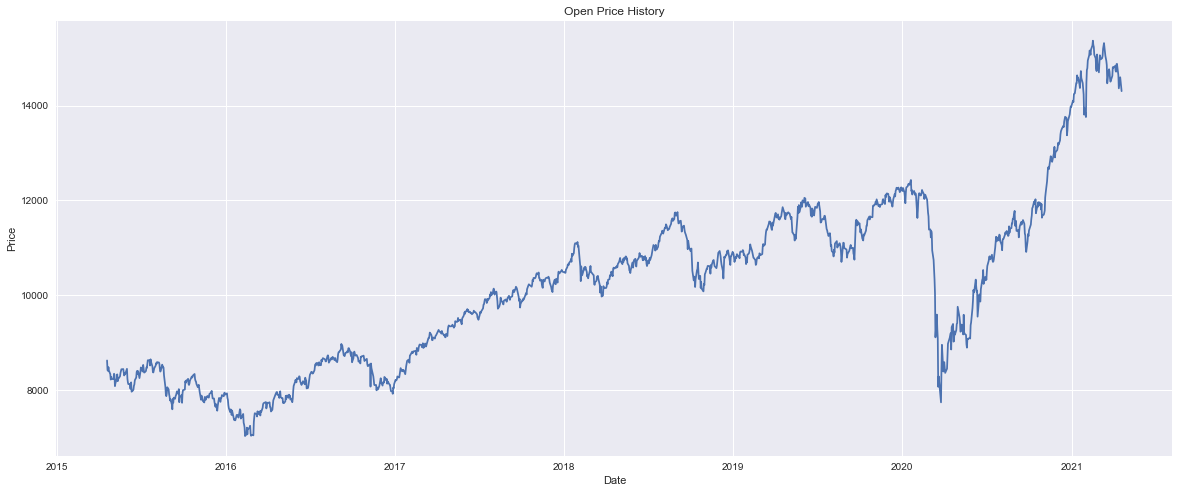

In [17]:
plt.figure(figsize = (20,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open Price History')
plt.plot(data['Open'])
plt.show()

### Close Price History 

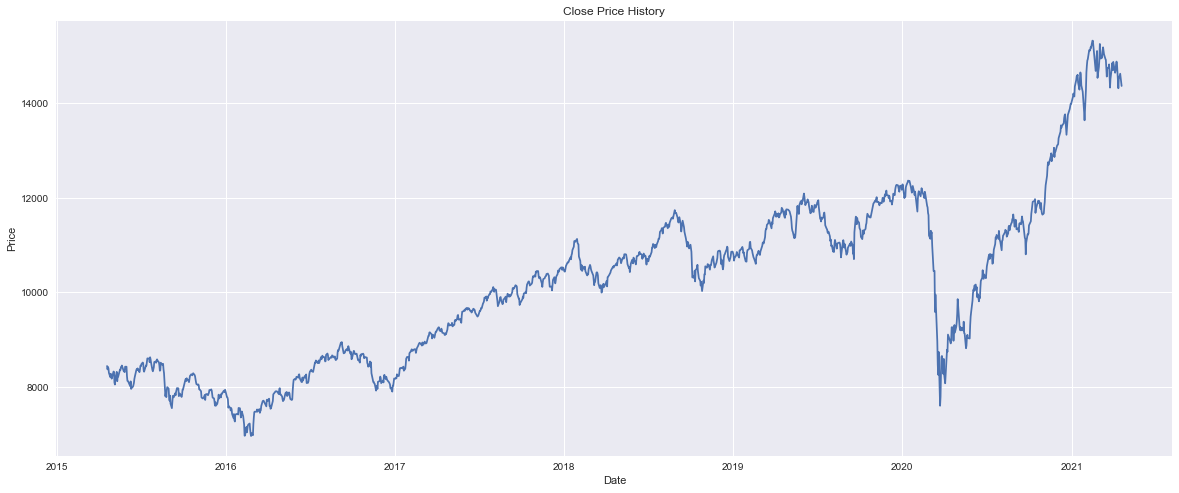

In [18]:
plt.figure(figsize = (20,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price History')
plt.plot(data['Close'])
plt.show()

### Volume Traded History 

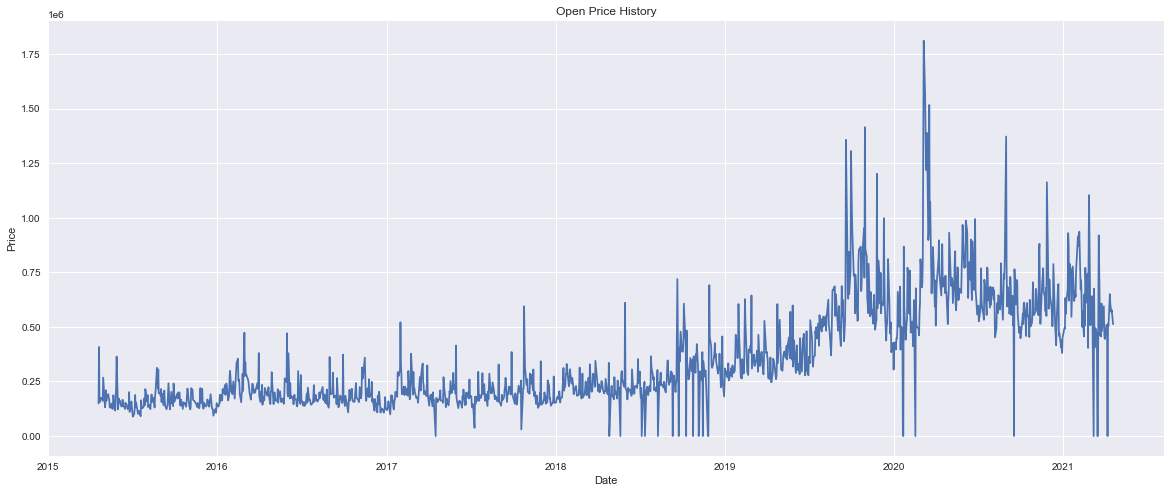

In [19]:
plt.figure(figsize = (20,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open Price History')
plt.plot(data['Volume'])
plt.show()

### Plotting Rolling Mean Closing Price 

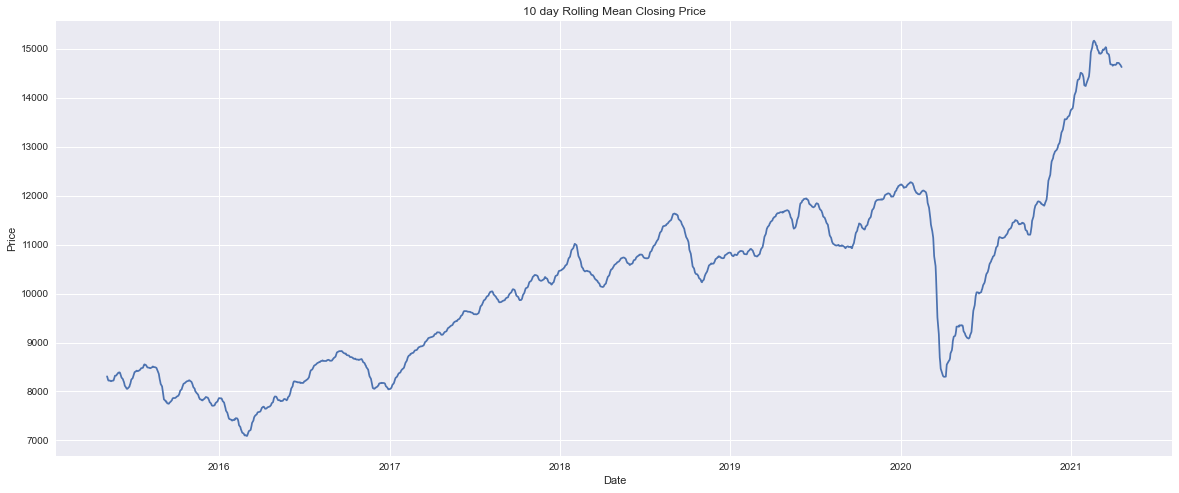

In [20]:
plt.figure(figsize = (20,8))
plt.plot(data['Close'].rolling(10).mean()[10:])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('10 day Rolling Mean Closing Price')
plt.show()

### Creating Dataset for Prediction 

#### Here, we will create a dataset where the output will be the closing price and input will be the closing price of previous 10 days. 

In [21]:
columns = ['Day1','Day2','Day3','Day4','Day5','Day6','Day7','Day8','Day9','Day10','Day11']

In [22]:
price_data = pd.DataFrame(columns = columns)

In [23]:
price_data

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,Day11


In [24]:
closing_prices = data['Close']

In [25]:
closing_prices.head(10)

Date
2015-04-20    8448.099609
2015-04-21    8377.750000
2015-04-22    8429.700195
2015-04-23    8398.299805
2015-04-24    8305.250000
2015-04-27    8213.799805
2015-04-28    8285.599609
2015-04-29    8239.750000
2015-04-30    8181.500000
2015-05-04    8331.950195
Name: Close, dtype: float64

In [26]:
for i in range (0,closing_prices.shape[0]-11):
    current_row = pd.Series(list(closing_prices[i:i+11]),index = price_data.columns)
    price_data = price_data.append(current_row,ignore_index = True)

In [27]:
price_data.head()

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,Day11
0,8448.099609,8377.750000,8429.700195,8398.299805,8305.250000,8213.799805,8285.599609,8239.750000,8181.500000,8331.950195,8324.799805
1,8377.750000,8429.700195,8398.299805,8305.250000,8213.799805,8285.599609,8239.750000,8181.500000,8331.950195,8324.799805,8097.000000
2,8429.700195,8398.299805,8305.250000,8213.799805,8285.599609,8239.750000,8181.500000,8331.950195,8324.799805,8097.000000,8057.299805
3,8398.299805,8305.250000,8213.799805,8285.599609,8239.750000,8181.500000,8331.950195,8324.799805,8097.000000,8057.299805,8191.500000
4,8305.250000,8213.799805,8285.599609,8239.750000,8181.500000,8331.950195,8324.799805,8097.000000,8057.299805,8191.500000,8325.250000


In [28]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day1    1463 non-null   float64
 1   Day2    1463 non-null   float64
 2   Day3    1463 non-null   float64
 3   Day4    1463 non-null   float64
 4   Day5    1463 non-null   float64
 5   Day6    1463 non-null   float64
 6   Day7    1463 non-null   float64
 7   Day8    1463 non-null   float64
 8   Day9    1463 non-null   float64
 9   Day10   1463 non-null   float64
 10  Day11   1463 non-null   float64
dtypes: float64(11)
memory usage: 125.9 KB


In [29]:
X = price_data.iloc[:,:-1].values
Y = price_data.iloc[:,1].values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33)

In [32]:
print("X_train: ",X_train.shape)
print("Y_train:",Y_train.shape)

X_train:  (980, 10)
Y_train: (980,)


In [33]:
print("X_test: ",X_test.shape)
print("Y_test:",Y_test.shape)

X_test:  (483, 10)
Y_test: (483,)


### Prediction 

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr_model = LinearRegression()

In [36]:
lr_model.fit(X_train,Y_train)

LinearRegression()

#### Accuracy on Training Set 

In [37]:
lr_model.score(X_train,Y_train)

1.0

#### Accuracy on Test  Set 

In [38]:
lr_model.score(X_test,Y_test)

1.0

In [39]:
lr_model.coef_

array([ 1.22874298e-15,  1.00000000e+00,  2.20790625e-16, -2.83262473e-16,
        3.10805253e-18, -4.17568813e-16,  4.57404669e-16, -2.51144504e-16,
        3.47358437e-16, -6.29131781e-17])

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
error = mean_squared_error(lr_model.predict(X_test),Y_test)

In [42]:
print(error)

1.2777285950591364e-22


## Textual Analysis

In [43]:
news = pd.read_csv("india-news-headlines.csv")
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [44]:
news.shape

(3424067, 3)

In [45]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [46]:
news.drop('headline_category',axis = 1,inplace = True)
news.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [47]:
news['Date'] = pd.to_datetime(news['publish_date'],format = "%Y%m%d")
news.drop('publish_date',axis = 1,inplace = True)
news.head()

,headline_text,Date
0,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,Fissures in Hurriyat over Pak visit,2001-01-02
2,America's unwanted heading for India?,2001-01-02
3,For bigwigs; it is destination Goa,2001-01-02
4,Extra buses to clear tourist traffic,2001-01-02


In [48]:
news = news.drop_duplicates()
news.head()

,headline_text,Date
0,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,Fissures in Hurriyat over Pak visit,2001-01-02
2,America's unwanted heading for India?,2001-01-02
3,For bigwigs; it is destination Goa,2001-01-02
4,Extra buses to clear tourist traffic,2001-01-02


In [49]:
news.set_index('Date',inplace = True)
news.head()

,headline_text
Date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,Fissures in Hurriyat over Pak visit
2001-01-02,America's unwanted heading for India?
2001-01-02,For bigwigs; it is destination Goa
2001-01-02,Extra buses to clear tourist traffic


In [50]:
from textblob import TextBlob

In [51]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [52]:
news['Subjectivity'] = news['headline_text'].apply(get_subjectivity)

news['Polarity'] = news['headline_text'].apply(get_polarity)

news.head()

,headline_text,Subjectivity,Polarity
Date,,,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00
2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00
2001-01-02,America's unwanted heading for India?,0.000000,0.00
2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00
2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05


In [54]:
news.describe()

,Subjectivity,Polarity
count,3.269574e+06,3.269574e+06
mean,1.574942e-01,2.533239e-02
std,2.704583e-01,1.948925e-01
min,0.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.888889e-01,0.000000e+00
max,1.000000e+00,1.000000e+00


<AxesSubplot:>

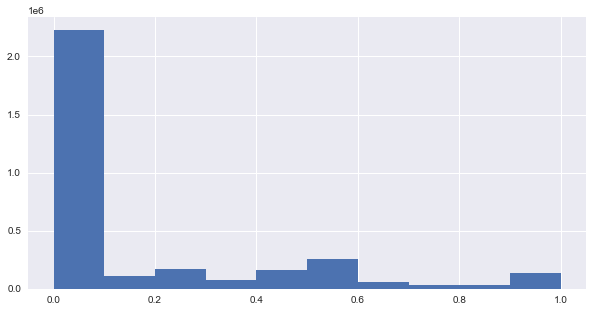

In [53]:
plt.figure(figsize = (10,5))
news['Subjectivity'].hist()

<AxesSubplot:>

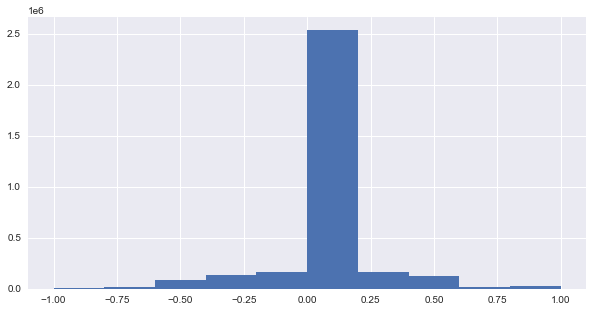

In [55]:
plt.figure(figsize = (10,5))
news['Polarity'].hist()

In [56]:
!pip install vaderSentiment

In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [60]:
sa = SentimentIntensityAnalyzer()

In [61]:
news['compound'] = [sa.polarity_scores(i)['compound'] for i in news['headline_text']]

In [62]:
news['Negative'] = [sa.polarity_scores(i)['neg'] for i in news['headline_text']]

In [63]:
news['Neutral'] = [sa.polarity_scores(i)['neu'] for i in news['headline_text']]

In [64]:
news['Positive'] = [sa.polarity_scores(i)['pos'] for i in news['headline_text']]

In [65]:
news.head()

,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
Date,,,,,,,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00,0.2924,0.000,0.805,0.195
2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00,0.0000,0.000,1.000,0.000
2001-01-02,America's unwanted heading for India?,0.000000,0.00,-0.2263,0.322,0.678,0.000
2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00,0.0000,0.000,1.000,0.000
2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05,0.3818,0.000,0.658,0.342


<AxesSubplot:>

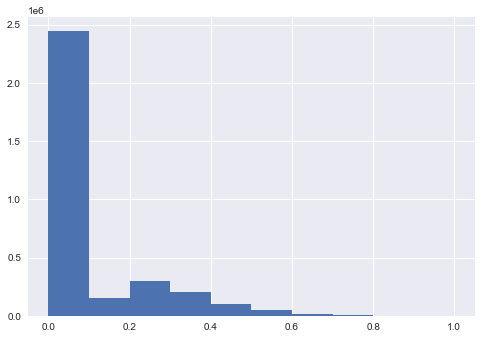

In [66]:
news['Positive'].hist()

<AxesSubplot:>

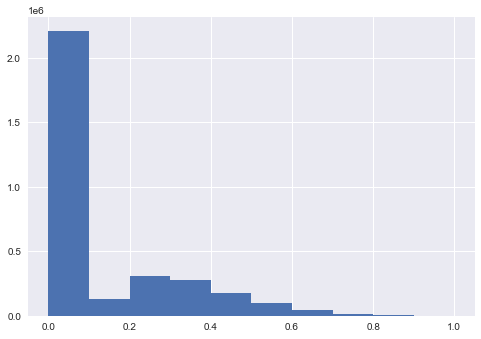

In [68]:
news['Negative'].hist()

<AxesSubplot:>

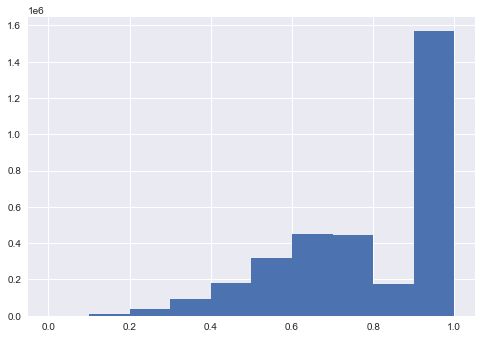

In [69]:
news['Neutral'].hist()

## Info 

### Nifty50 data from www.finance.yahoo.com
### News data from https://bit.ly/36fFPI6